In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def alpha_linear(epoch, total_epochs, start=0.9, end=0.1):
    """α(t) décroît linéairement de start à end"""
    return start - (start - end) * (epoch / (total_epochs - 1))

In [3]:
def alpha_cosine(epoch, total_epochs, start=0.9, end=0.1):
    """α(t) décroît selon un cosinus (plus doux au début et à la fin)."""
    return end + 0.5 * (start - end) * (1 + np.cos(np.pi * epoch / total_epochs))

In [4]:
def alpha_exponential(epoch, total_epochs, start=0.9, end=0.1, k=5):
    """α(t) décroît rapidement au début puis se stabilise."""
    t = epoch / (total_epochs - 1)
    return end + (start - end) * np.exp(-k * t)

In [5]:
def alpha_sigmoid(epoch, total_epochs, start=0.9, end=0.1, steepness=10):
    """α(t) transition sigmoïde : lente au début et à la fin, rapide au milieu."""
    t = (epoch / total_epochs - 0.5) * steepness
    return end + (start - end) / (1 + np.exp(t))

In [6]:
def alpha_cyclic(epoch, total_epochs, start=0.9, end=0.1, cycles=3):
    """α(t) oscille entre start et end sur plusieurs cycles."""
    t = epoch / total_epochs
    return end + 0.5 * (start - end) * (1 + np.cos(2 * np.pi * cycles * t))

In [7]:
def alpha_delayed(epoch, total_epochs, start=0.9, end=0.1, delay_ratio=0.5):
    """α(t) reste constant un moment puis décroît linéairement."""
    if epoch < total_epochs * delay_ratio:
        return start
    progress = (epoch - total_epochs * delay_ratio) / (total_epochs * (1 - delay_ratio))
    return start - (start - end) * min(progress, 1.0)

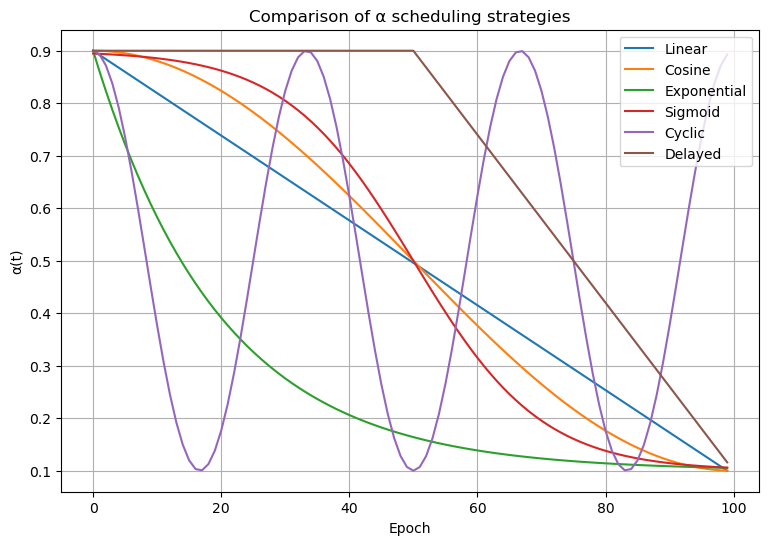

In [8]:
EPOCHS = 100
epochs = np.arange(EPOCHS)
funcs = {
    "Linear": [alpha_linear(e, EPOCHS) for e in epochs],
    "Cosine": [alpha_cosine(e, EPOCHS) for e in epochs],
    "Exponential": [alpha_exponential(e, EPOCHS) for e in epochs],
    "Sigmoid": [alpha_sigmoid(e, EPOCHS) for e in epochs],
    "Cyclic": [alpha_cyclic(e, EPOCHS) for e in epochs],
    "Delayed": [alpha_delayed(e, EPOCHS) for e in epochs],
}

plt.figure(figsize=(9,6))
for name, vals in funcs.items():
    plt.plot(epochs, vals, label=name)
plt.xlabel("Epoch")
plt.ylabel("α(t)")
plt.title("Comparison of α scheduling strategies")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def alpha_linear(epoch, total_epochs, start=0.9, end=0.1):
    return start - (start - end) * (epoch / (total_epochs - 1))

def odd_alpha_linear(epoch, total_epochs, start=0.9, end=0.1):
    return start - (start - end) * (epoch / total_epochs - 1)